## Visualizations of NHANES Data - Looking at Impact of Socioeconomic Disparities on Mental Health

### Loading in packages

In [1]:
# loading in necessary packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/antarasengupta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/antarasengupta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Data Setup

In [2]:
# reading in dataframe
df = pd.read_csv('nhanes_imputed_1.csv')

# changing colnames to more intuitive ones
df.columns = column_names = [
    "respondent_id",         # SEQN
    "depression_q1",         # DPQ010
    "depression_q2",         # DPQ020
    "depression_q3",         # DPQ030
    "depression_q4",         # DPQ040
    "depression_q5",         # DPQ050
    "depression_q6",         # DPQ060
    "depression_q7",         # DPQ070
    "depression_q8",         # DPQ080
    "depression_q9",         # DPQ090
    "depression_q10",        # DPQ100
    "survey_year",           # SDDSRVYR
    "respondent_status",     # RIDSTATR
    "gender",                # RIAGENDR
    "age_years",             # RIDAGEYR
    "ethnicity_group1",      # RIDRETH1
    "ethnicity_group3",      # RIDRETH3
    "exam_month",            # RIDEXMON
    "exam_age_months",       # RIDEXAGM
    "military_status",       # DMQMILIZ
    "birth_place",           # DMDBORN4
    "years_in_usa",          # DMDYRUSR
    "education_level",       # DMDEDUC2
    "marital_status",        # DMDMARTZ
    "pregnancy_status",      # RIDEXPRG
    "household_size",        # DMDHHSIZ
    "household_gender",      # DMDHRGND
    "household_relationship_age",  # DMDHRAGZ
    "household_relationship_education",  # DMDHREDZ
    "household_relationship_marital",  # DMDHRMAZ
    "household_relationship_employment",  # DMDHSEDZ
    "interview_weight_2yr",  # WTINT2YR
    "exam_weight_2yr",       # WTMEC2YR
    "sample_stratum",        # SDMVSTRA
    "sample_psu",            # SDMVPSU
    "income_to_poverty_ratio",  # INDFMPIR
    "phq9_total_score"       # PHQ9_TOTAL
]

df

,respondent_id,depression_q1,depression_q2,depression_q3,depression_q4,depression_q5,depression_q6,depression_q7,depression_q8,depression_q9,...,household_relationship_age,household_relationship_education,household_relationship_marital,household_relationship_employment,interview_weight_2yr,exam_weight_2yr,sample_stratum,sample_psu,income_to_poverty_ratio,phq9_total_score
0,130378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,3,50055.450807,54374.463898,173,2,5.00,0
1,130379,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2,3,3,29087.450605,34084.721548,173,2,5.00,1
2,130380,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,3,80062.674301,81196.277992,174,1,1.41,2
3,130386,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,3,3,3,30995.282610,39988.452940,179,1,1.33,1
4,130387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,3,19896.970559,20776.254850,181,1,1.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6332,142305,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,...,2,2,3,3,28979.979165,43483.407534,180,2,2.25,4
6333,142307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,3,69419.620456,64962.328962,181,1,2.03,0
6334,142308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2,3,3,32696.313477,44367.534132,183,2,1.95,0
6335,142309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2,3,3,30547.974564,46249.361849,176,1,3.11,0


Variables we should look into:

* INDFMPIR - income-to-poverty ratio 
* DMDEDUC2 - education level
* RIAGENDR - gender
* DMDMARTZ - marital status
* RIDAGEYR - age years


In [3]:
interest_cols = ['income_to_poverty_ratio','education_level','gender','marital_status','age_years','phq9_total_score']
interest_cols

['income_to_poverty_ratio',
 'education_level',
 'gender',
 'marital_status',
 'age_years',
 'phq9_total_score']

In [4]:
# interesting to see all the vals in each of the unique cols
for col in interest_cols:
    print(col)
    print(df[col].unique())
    print()

income_to_poverty_ratio
[5.   1.41 1.33 1.32 0.81 2.16 0.93 3.04 1.1  4.82 4.48 1.67 0.91 3.36
 4.42 3.22 4.37 1.02 3.14 0.05 0.11 1.13 0.2  2.64 3.82 0.98 1.91 0.88
 3.43 1.19 0.67 1.09 4.22 0.65 4.36 3.47 1.65 2.33 2.02 1.08 2.28 1.27
 2.73 0.79 2.98 1.52 0.96 2.06 3.97 4.06 3.44 2.43 0.73 1.64 3.02 1.46
 2.96 4.31 1.23 4.71 3.58 0.86 1.34 0.72 0.92 3.57 0.51 4.62 0.07 1.94
 1.2  1.55 0.18 1.66 3.24 0.52 2.61 1.72 0.69 4.08 2.41 0.25 2.17 0.57
 4.54 4.17 2.31 4.68 0.61 0.87 3.7  3.   2.52 2.82 2.65 0.23 1.82 0.39
 1.95 1.04 3.68 1.97 2.29 1.01 0.77 0.85 0.89 3.28 2.18 1.35 1.61 1.84
 2.21 1.37 1.4  2.13 1.3  3.18 3.09 2.87 1.44 3.88 1.51 1.75 1.85 0.24
 2.58 1.26 4.57 2.67 1.81 0.   1.03 4.32 0.83 1.62 1.48 0.75 4.88 1.39
 1.69 3.45 0.3  2.91 3.11 0.66 2.8  3.3  3.55 4.23 2.25 4.83 1.18 0.76
 4.92 0.02 0.94 2.94 2.54 2.88 3.69 2.5  2.15 4.69 1.16 1.12 2.09 2.81
 0.55 0.04 2.19 0.41 3.06 2.07 0.27 0.58 4.05 3.6  2.34 4.55 3.23 0.43
 0.13 2.38 0.03 2.75 0.37 2.74 3.42 2.47 1.53 2.32 1.

In [5]:
# cleaning the data
df = df[~df['marital_status'].isin([77, 99])]
df = df[~df['education_level'].isin([9])]

### EDA Visualizations

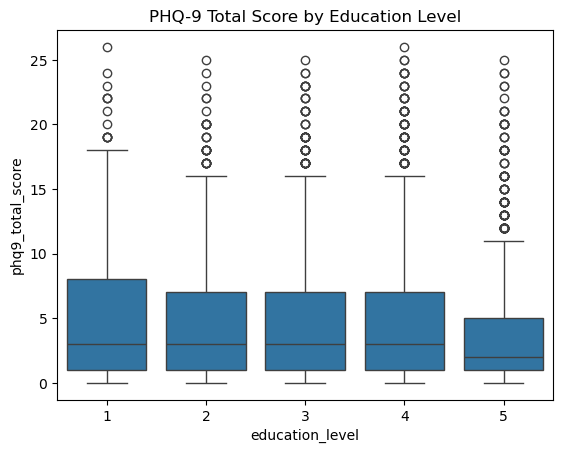

In [6]:
sns.boxplot(x='education_level', y='phq9_total_score', data=df)
plt.title('PHQ-9 Total Score by Education Level')
plt.show()

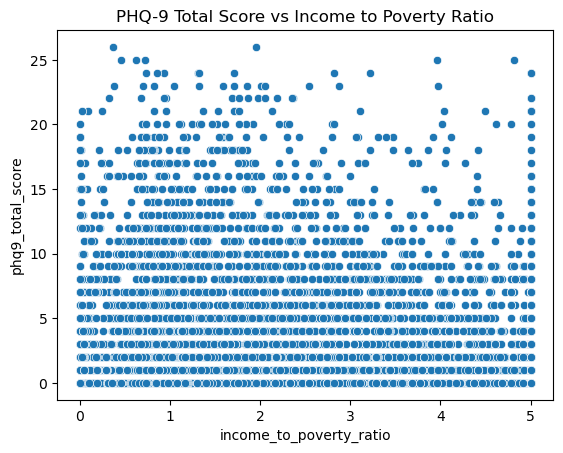

In [7]:
sns.scatterplot(x='income_to_poverty_ratio', y='phq9_total_score', data=df)
plt.title('PHQ-9 Total Score vs Income to Poverty Ratio')
plt.show()

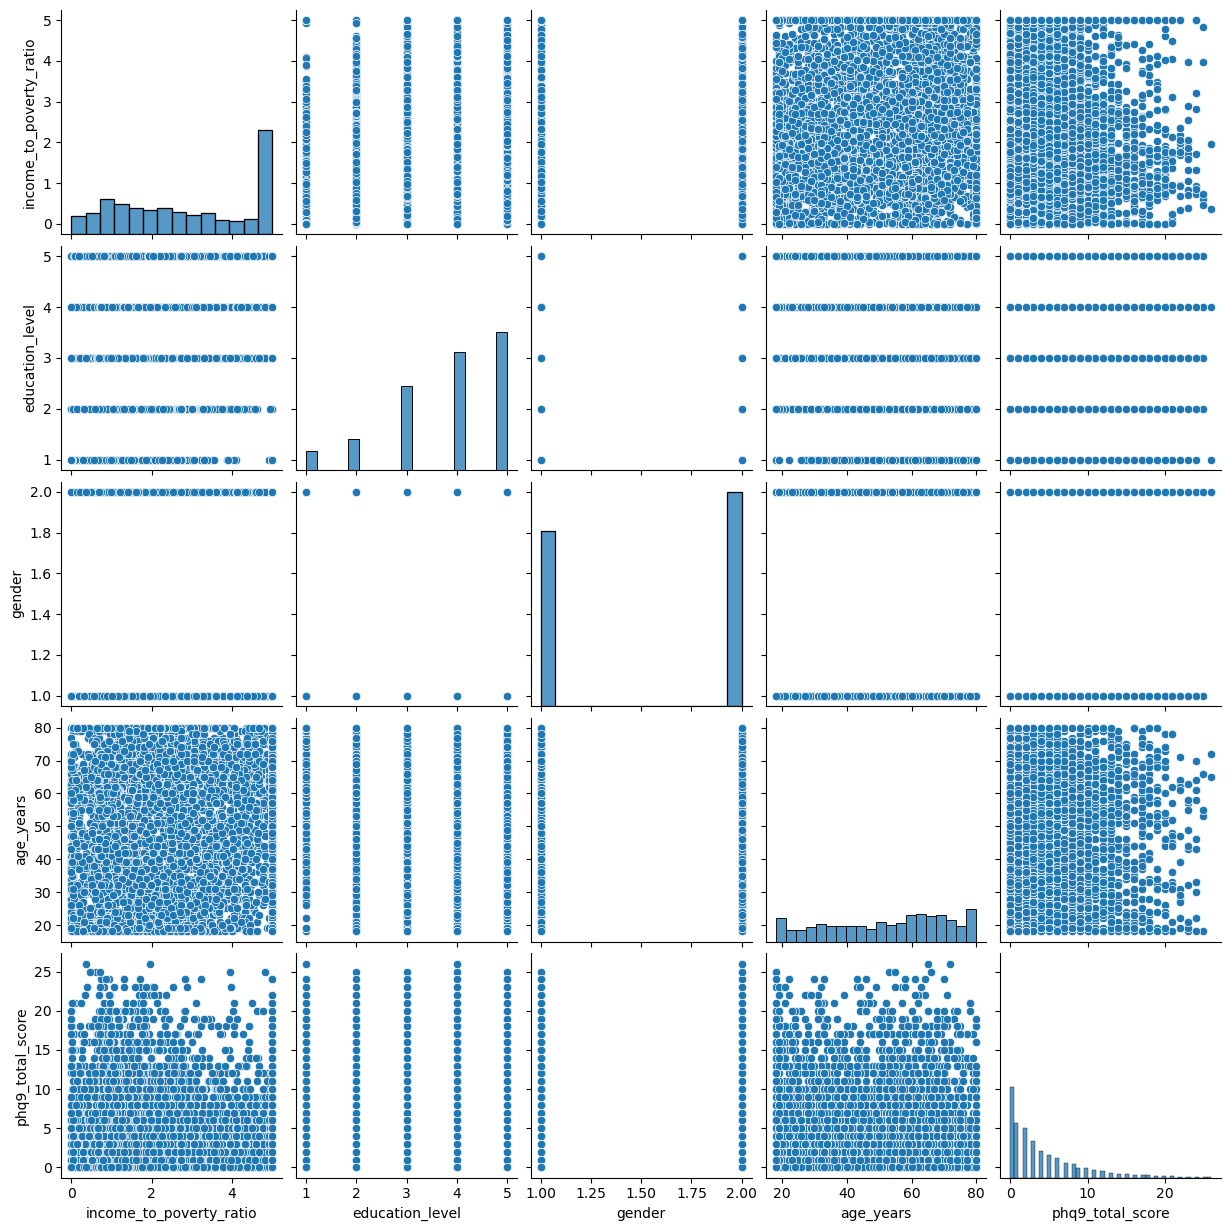

In [8]:
sns.pairplot(df[['income_to_poverty_ratio', 'education_level', 'gender', 'age_years', 'phq9_total_score']])
plt.show()

### Statistical Testing

#### T-Tests

In [10]:
# initializing results list
results = []

# initializing data framme for analysis
data = df

# function to determine significance
def significance_label(p_value):
    if p_value < 0.001:
        return "Highly Significant (★)"
    elif p_value < 0.01:
        return "Significant (★)"
    elif p_value < 0.05:
        return "Moderately Significant (★)"
    else:
        return "Not Significant"

# T-test for gender
group1 = data[data['gender'] == 1]['phq9_total_score']
group2 = data[data['gender'] == 2]['phq9_total_score']
t_stat, p_value = stats.ttest_ind(group1, group2)
results.append({
    'test_name': 'Independent t-test',
    'variables': 'phq9_total_score ~ gender',
    'outcome': f't-statistic: {t_stat:.2f}, p-value: {p_value:.4f}, {significance_label(p_value)}'
})

# ANOVA for education level
anova_results = ols('phq9_total_score ~ C(education_level)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_results, typ=2)
f_stat = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]
results.append({
    'test_name': 'ANOVA',
    'variables': 'phq9_total_score ~ education_level',
    'outcome': f'F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}, {significance_label(p_value)}'
})

# ANOVA for marital status
anova_results_marital = ols('phq9_total_score ~ C(marital_status)', data=data).fit()
anova_table_marital = sm.stats.anova_lm(anova_results_marital, typ=2)
f_stat_marital = anova_table_marital['F'][0]
p_value_marital = anova_table_marital['PR(>F)'][0]
results.append({
    'test_name': 'ANOVA',
    'variables': 'phq9_total_score ~ marital_status',
    'outcome': f'F-statistic: {f_stat_marital:.2f}, p-value: {p_value_marital:.4f}, {significance_label(p_value_marital)}'
})

# Correlation for income_to_poverty_ratio
corr, p_value_corr = stats.pearsonr(data['income_to_poverty_ratio'], data['phq9_total_score'])
results.append({
    'test_name': 'Pearson Correlation',
    'variables': 'phq9_total_score ~ income_to_poverty_ratio',
    'outcome': f'Correlation: {corr:.2f}, p-value: {p_value_corr:.4f}, {significance_label(p_value_corr)}'
})

# Correlation for age_years
corr_age, p_value_age = stats.pearsonr(data['age_years'], data['phq9_total_score'])
results.append({
    'test_name': 'Pearson Correlation',
    'variables': 'phq9_total_score ~ age_years',
    'outcome': f'Correlation: {corr_age:.2f}, p-value: {p_value_age:.4f}, {significance_label(p_value_age)}'
})

# creating a DataFrame to present the results
results_df = pd.DataFrame(results)

# saving results
results_df.to_html('results.html', index=False, escape=False)

/var/folders/s4/kx5km5257tqfkv8t9br4bgmm0000gn/T/ipykernel_28538/3523926926.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_stat = anova_table['F'][0]
/var/folders/s4/kx5km5257tqfkv8t9br4bgmm0000gn/T/ipykernel_28538/3523926926.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/var/folders/s4/kx5km5257tqfkv8t9br4bgmm0000gn/T/ipykernel_28538/3523926926.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `se

#### Other tests

In [11]:
# poverty ratio vs phq9 score
corr, p_value = pearsonr(df['income_to_poverty_ratio'], df['phq9_total_score'])
print(corr)
print(p_value)

-0.19591055991504755
9.011706749006085e-56


In [12]:
# t test with gender and phq9 score
group1 = df[df['gender'] == 1]['phq9_total_score']
group2 = df[df['gender'] == 2]['phq9_total_score']

t_stat, p_value = ttest_ind(group1, group2)

print(t_stat)
print(p_value)

-8.836542788633807
1.261509872763201e-18


### Logistic Regression

## Gender

In [13]:
# creating df just for logreg
logreg_df = df[['gender','phq9_total_score']]
logreg_df['gender'].replace({1:0,2:1},inplace=True)
logreg_df

/var/folders/s4/kx5km5257tqfkv8t9br4bgmm0000gn/T/ipykernel_28538/2184377775.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  logreg_df['gender'].replace({1:0,2:1},inplace=True)
/var/folders/s4/kx5km5257tqfkv8t9br4bgmm0000gn/T/ipykernel_28538/2184377775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df['gender'].replace({1:0,2:1}

,gender,phq9_total_score
0,0,0
1,0,1
2,1,2
3,0,1
4,1,0
...,...,...
6332,1,4
6333,1,0
6334,0,0
6335,0,0


In [14]:
# testing out array formats so it works with the model (this one does)
np.array(logreg_df['phq9_total_score']).reshape(-1, 1)

array([[0],
       [1],
       [2],
       ...,
       [0],
       [0],
       [1]])

In [15]:
# defining X and Y
X = np.array(logreg_df['phq9_total_score']).reshape(-1, 1)
y = np.array(logreg_df['gender'])

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating a logreg model
model = LogisticRegression()

# training + predictions 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5252764612954186


## Marital Status

In [16]:
# creating df just for logreg for marital status
marital_stat = df[['marital_status','phq9_total_score']]

# essentially, I am just looking at married vs. unmarried
# group 2(widowed/divorced) and 3 (never married) into one group - unmarried and code it as 0
# keep 1 (married) as 1
marital_stat['marital_status'].replace({2:0,3:0},inplace=True)
marital_stat

/var/folders/s4/kx5km5257tqfkv8t9br4bgmm0000gn/T/ipykernel_28538/212238728.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marital_stat['marital_status'].replace({2:0,3:0},inplace=True)
/var/folders/s4/kx5km5257tqfkv8t9br4bgmm0000gn/T/ipykernel_28538/212238728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital_stat['marital_status

,marital_status,phq9_total_score
0,1,0
1,1,1
2,1,2
3,1,1
4,0,0
...,...,...
6332,0,4
6333,0,0
6334,1,0
6335,0,0


In [17]:
# defining X and Y
X = np.array(marital_stat['phq9_total_score']).reshape(-1, 1)
y = np.array(marital_stat['marital_status'])

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating a logreg model
model = LogisticRegression()

# training + predictions 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5687203791469194
